# HW1
### 根據UCI-Sonar資料集(2 classes, 60 features) 設計一個Maximum A Posterior  (MAP) classifier，50%資料用於訓練，另50%用於測試。需計算出
* mean vector
* covariance matrix
* error rate

## 基本概念

### Bayesian Decision Theory

針對眼前發生的現象和獲得的新資訊，搭配過往的經驗得出結果。

例如：今天出門時烏雲密佈(特徵)，是否帶傘出門？
* 一年當中有95天是雨天，270天是晴天，可知prior：雨天26%，晴天74%
* 雨天時有90%的機率是烏雲密佈，晴天時有10%的機率會烏雲密布，可知likelihood ratio：9
* 將以往的觀察與今天烏雲密布的現象結合：95x9 : 270x1，可知posteroir(這裡先忽略evidence)：新雨天 76%，新的晴天 24%
可知今天雨天的機率比較大，因此要帶雨傘出門！

### Bayesian Classifier

統計學指出："若資料的分布狀態為常態分佈時，貝氏分類器必為最佳的分類器。"

代號：
* $ Q_{i}(x) = P(w_{i}|x)$ ----------------- posterior 在特徵$x$的情況下為類別$w_{i}$的機率
* $ P_{i}(x) = P(x|w_{i})$ ----------------- likelihood 在類別$w_{i}$的情況下特徵$x$發生的機率
* $ P_{i} = P(w_{i})$ --------------------------- pior 不考慮任何特徵影響，類別$w_{i}$發生的機率

$$ posterior = \frac{likelihood \times pior}{evidence} => Q_{i}(x) = \frac{P_{i}(x) P_{i}}{P(x)} $$

Decision Rule：
Decide $w_{1}$ if $Q_{1}(x) > Q_{2}(x)$; Otherwise decide $w_{2}$.

白話-計算出來的後驗機率誰大就判給誰。

### 常態分佈下的貝氏分類器

假設特徵$x$的機率分布為常態分佈

![常態分佈圖](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/488px-Normal_Distribution_PDF.svg.png)

則機率密度函數為 $ P(x) = \frac{1}{\sigma \sqrt{2\pi}}exp(-\frac{(x-\mu)^2}{2\sigma^2})$。

$\mu$是期望值，$\sigma$是標準差。

對於$d$維常態分佈，其機率密度函數為
$$ P(x) = \frac{1}{|\Sigma|^{\frac{1}{2}} \sqrt{2\pi}^d}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$$
$x = (x_{1}, x_{2}, x_{3}, ..., x_{d})^T$ 是$d$維特徵向量，$\mu = (\mu_1, \mu_2, \mu_3, ..., \mu_d)^T$ 是$d$維mean vector


$\Sigma = E((x-\mu)(x-\mu)^T)$ 是$d\times d$的covariance matrices，$\Sigma^{-1}$ 是其逆矩陣，$|\Sigma|$ 是其行列式

* $\mu$ 決定分布的中心位置， $\Sigma$ 決定區域的形狀

計算posteroir時，由於evidence不影響分類，這裡略過，因此根據上式得
$$Q_i(x) = P_iP_i(x) = \frac{P_i}{|\Sigma_i|^{\frac{1}{2}} \sqrt{2\pi}^d}exp(-\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}(x-\mu_i))$$
為方便計算，將上式轉為對數函數，可得
$$ln(Q_i(x)) = ln(P_i) + ln(\frac{1}{|\Sigma_i|^{\frac{1}{2}} \sqrt{2\pi}^d}exp(-\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}(x-\mu_i)))$$
$$ = ln(P_i) - \frac{1}{2}ln|\Sigma_i| - \frac{d}{2}ln(2\pi) -\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}(x-\mu_i)$$
由於$\frac{d}{2}ln(2\pi)$不影響分類，這裡也略過，得
$$ ln(P_i) - \frac{1}{2}ln|\Sigma_i| -\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}(x-\mu_i)$$

此時，決策邊界為 $Q_i(x) = Q_j(x)$，得
$$ ln(P_i) - \frac{1}{2}ln|\Sigma_i| -\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}(x-\mu_i) = ln(P_j) - \frac{1}{2}ln|\Sigma_j| -\frac{1}{2}(x-\mu_j)^T\Sigma^{-1}(x-\mu_j) $$
$$ ln(\frac{P_i}{P_j}) - \frac{1}{2}ln\frac{|\Sigma_i|}{|\Sigma_j|} -\frac{1}{2}[(x-\mu_i)^T\Sigma^{-1}(x-\mu_i) - (x-\mu_j)^T\Sigma^{-1}(x-\mu_j)] = 0 $$
$$ - \frac{1}{2}ln\frac{|\Sigma_i|}{|\Sigma_j|} -\frac{1}{2}[(x-\mu_i)^T\Sigma^{-1}(x-\mu_i) - (x-\mu_j)^T\Sigma^{-1}(x-\mu_j)] =  -ln(\frac{P_i}{P_j}) $$
$$  \frac{1}{2}ln\frac{|\Sigma_i|}{|\Sigma_j|} +\frac{1}{2}[(x-\mu_i)^T\Sigma^{-1}(x-\mu_i) - (x-\mu_j)^T\Sigma^{-1}(x-\mu_j)] =  ln(\frac{P_i}{P_j}) $$

## 資料集說明

### Connectionist Bench (Sonar, Mines vs. Rocks) Data Set
 dataset: http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)
 * Number of Instances: 208
 * Number of Attributes: 60
 
information:
 * sonar.mines: contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.
 * sonar.rocks: contains 97 patterns obtained from rocks under similar conditions.
 * The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

## 想法

目的：將資料集的聲納分成兩類(Mines&Rocks)

step1. 將資料分成兩堆(50% for training, 50% for testing)。


step2. 使用50%的training data分別計算出兩個類別60個特徵的 $\mu$ (mean vector)，計算 $\Sigma$ (covariance matrices)。

step3. 利用mean vector和covariance matrices算出後驗機率大小。

step4. 比較後驗機率進行分類。

## 實作

### 連接Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ls '/content/drive/My Drive/Pattern_Recognition/HW1'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
HW1.ipynb  HW1_v2.ipynb  sonar.all-data


### 讀取資料

In [0]:
file = '/content/drive/My Drive/Pattern_Recognition/HW1/sonar.all-data'
data = []
pr_m = 0  #prior of class M
pr_r = 0  ##prior of class R
with open(file,'r') as f:
  for line in f:
    dicts = {}
    features = line.strip('\n').split(',')
    dicts['class'] = features[len(features)-1]
    features = [float(features[i]) for i in range(len(features)-1)]
    dicts['feature'] = features
    data.append(dicts)
    if dicts['class'] == 'M':
      pr_m += 1
    elif dicts['class'] == 'R':
      pr_r += 1
    
pr_m = pr_m/len(data)
pr_r = pr_r/len(data)

print('data[0]:', data[0])
print('class of data[0]:', data[0]['class'])
print('feature of data[0]:', data[0]['feature'])
print('total:', len(data))
print('prior of m:', pr_m)
print('prior of r:', pr_r)


data[0]: {'class': 'R', 'feature': [0.02, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.066, 0.2273, 0.31, 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.555, 0.6711, 0.6415, 0.7104, 0.808, 0.6791, 0.3857, 0.1307, 0.2604, 0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744, 0.051, 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343, 0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167, 0.018, 0.0084, 0.009, 0.0032]}
class of data[0]: R
feature of data[0]: [0.02, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.066, 0.2273, 0.31, 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.555, 0.6711, 0.6415, 0.7104, 0.808, 0.6791, 0.3857, 0.1307, 0.2604, 0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744, 0.051, 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343, 0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167, 0.018, 0.008

### 正規化

In [0]:
from sklearn import preprocessing
import numpy as np

#normalize
tmp = np.array([i['feature'] for i in data])
tmp = preprocessing.scale(tmp)
for i in range(len(tmp)):
  data[i]['feature'] = tmp[i]


### 在資料集中選擇50%資料作為training data, 50%為test data
* 隨機分組
* 平均分組

擇一執行即可

In [0]:
# 隨機分配資料
import random

print('before shuffle:')
for i in data:
  print(i['class'], end=' ')
print()
random.shuffle(data)
print('after shuffle:')
for i in data:
  print(i['class'], end=' ')
print()
train_set = data[0: int(len(data)/2)]
test_set = data[int(len(data)/2): int(len(data))]
print('number of training set:', len(train_set))
for i in train_set:
  print(i['class'], end=' ')
print()
print('number of test set:', len(test_set))
for i in test_set:
  print(i['class'], end=' ')

before shuffle:
R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M 
after shuffle:
R R M R R R R M M M M R R R M R R R M R R M M R R M R M M M R R R M M M M R R R M R R M R R M R M M M M M M M M R M M M R R R M M M R M R M R M M R M M R R R M R R R R M M M R M M M R M M M R R R R R R R R M M M R R R M R M M M M R R M R R M R R M M R R R M M R R M M R R M M R M M M M M M M R M R R M M M R M R R M M R M R R M R R M M R R R M R M M M M M M M M R M M M R M R M R M M M R R R M R M R R R M M M M M M 
number of training set: 104
R R M R R R R M M M M R R R M R R R M R R M M R R M R M M M R R R M M M M R R R M R R M R R M R M M M M M M

In [0]:
# 平均分配資料
train_set = []
test_set = []
for i in range(len(data)):
  if i % 2 == 1:
    train_set.append(data[i])
  else:
    test_set.append(data[i])

print('number of train set:', len(train_set))    
for i in train_set:
  print(i['class'], end=' ')
print()
print('number of test set:', len(test_set))
for i in test_set:
  print(i['class'], end=' ')

number of train set: 104
R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M 
number of test set: 104
R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R R M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M M 

In [0]:
data_m = [i for i in train_set if i['class'] == 'M']
data_r = [i for i in train_set if i['class'] == 'R']
data_m_f = np.array([i['feature'] for i in data_m])
data_r_f = np.array([i['feature'] for i in data_r])
print('number of data_m:', len(data_m))
print('number of data_r:', len(data_r))

number of data_m: 56
number of data_r: 48


### 分別計算mean vector & covariance matrices

In [0]:
import numpy as np

# calculate mean vector
def mean_vector(data):
  return np.mean(data,axis=0)

# calculate covariance matrix
def covariance_matrix(data):
  mean = np.mean(data,axis=0)
  data = data - mean
  cov_mat = data.T.dot(data) / (data.shape[0] - 1)
  return cov_mat

In [0]:
# mean vector
m_mu = mean_vector(data_m_f)
r_mu = mean_vector(data_r_f)
# covariance matrix
m_co = covariance_matrix(data_m_f)
r_co = covariance_matrix(data_r_f)
print('Mine')
print('mean vector:', m_mu)
print('Rock')
print('mean vector:', r_mu)      

Mine
mean vector: [ 0.17480578  0.12423404  0.10098596  0.18871685  0.13396945  0.02879195
  0.12987114  0.21058319  0.26887087  0.28466396  0.34594295  0.27287842
  0.19635906  0.14242708  0.02421698  0.00154295 -0.00369018  0.04823805
  0.15292573  0.25588143  0.27594362  0.23858747  0.17099901  0.16895571
  0.10829459  0.11249599  0.1180318   0.04899046 -0.05725441 -0.03639748
 -0.14251482 -0.08130613 -0.0795105  -0.09246201 -0.15334424 -0.24134346
 -0.17116452  0.0306524   0.09927997  0.03470837  0.06650086  0.16708782
  0.19659731  0.16688762  0.28853335  0.24941625  0.1954323   0.29187731
  0.30523339  0.20926653  0.26525759  0.17199629  0.20964181  0.15351192
  0.11677794  0.31483462  0.05838108  0.17777226  0.08364489  0.10992711]
Rock
mean vector: [-0.23023655 -0.2031047  -0.1802317  -0.2754667  -0.20657802 -0.02871468
 -0.07714197 -0.15197026 -0.35085033 -0.40036788 -0.39385109 -0.30895046
 -0.2655528  -0.07339941  0.00404918  0.04331527  0.0277607  -0.05588645
 -0.21653169 -

### 觀察特徵機率密度分佈

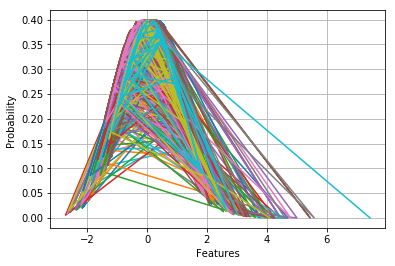

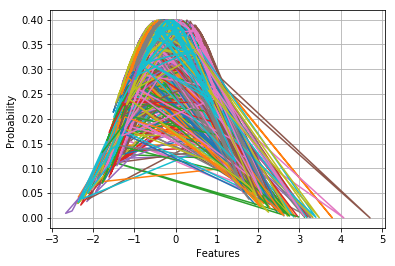

In [0]:
import scipy.stats as st
import matplotlib.pyplot as plt
# 觀察特徵機率密度分布
# Mine
probs = st.norm.pdf(data_m_f, m_mu)
plt.plot(data_m_f, probs)
# plt.hist(data_m_f, normed=True, histtype='stepfilled', alpha=0.2)
plt.xlabel('Features')
plt.ylabel('Probability ')
plt.grid()
plt.show()
# Rock
probs = st.norm.pdf(data_r_f, r_mu)
plt.plot(data_r_f, probs)
# plt.hist(data_m_f, normed=True, histtype='stepfilled', alpha=0.2)
plt.xlabel('Features')
plt.ylabel('Probability ')
plt.grid()
plt.show()

### 計算後驗機率

In [0]:
import math 

# calculate posteroir
def posteroir(pr, x, mu,co):
  x = np.array(x)
  va = np.subtract(x, mu)
  log_det = np.linalg.slogdet(r_co)[1]
  return 2 * math.log(pr) - np.matmul(np.matmul(va.T, np.matrix(co).I), va) - log_det

In [0]:
def count_error(dataset):
  error = 0
  for i in range(len(dataset)):
    ans = ''
    q_m = posteroir(pr_m, dataset[i]['feature'], m_mu, m_co)
    q_r = posteroir(pr_r, dataset[i]['feature'], r_mu, r_co)
    if(q_m  > q_r):
      ans = 'M'
    else:
      ans = 'R'
    if(dataset[i]['class'] != ans):
      error += 1
  error_rate = error / len(dataset) * 100
  return error_rate

In [0]:
error_rate = count_error(train_set)
print('in training set')
print('error rate:', error_rate, '%')
print('accuracy:', 100-error_rate, '%')

in training set
error rate: 24.03846153846154 %
accuracy: 75.96153846153845 %


In [0]:
error_rate = count_error(test_set)
print('in testing set')
print('error rate:', error_rate, '%')
print('accuracy:', 100-error_rate, '%')

in testing set
error rate: 54.807692307692314 %
accuracy: 45.192307692307686 %


### 紀錄
在平均分配資料的情況下

無正規化

 in training set

*  error rate: 32.69230769230769 %
* accuracy: 67.3076923076923 % 

in testing set
* error rate: 49.03846153846153 %
* accuracy: 50.96153846153847 %

正規化

in training set
* error rate: 24.03846153846154 %
* accuracy: 75.96153846153845 %

in testing set
* error rate: 54.807692307692314 %
* accuracy: 45.192307692307686 %



## 用scikit learn的貝氏分類器實作
高斯模型

In [0]:
from sklearn.naive_bayes import GaussianNB 
import numpy as np
target = []
datas = []
for i in train_set:
  target.append(i['class'])
  datas.append(i['feature'])
model = GaussianNB()
model.fit(datas, target)

# testing
target_new = []
datas_new = []
for i in test_set:
  target_new.append(i['class'])
  datas_new.append(i['feature'])
p = model.predict(datasn)

error=0
for i in range(len(p)):
  if p[i] != targetn[i]:
    error+=1
error_rate = error / len(test_set) * 100

print('in testing set')
print('error rate:', error_rate, '%')
print('accuracy:', 100-error_rate, '%')

in testing set
error rate: 25.961538461538463 %
accuracy: 74.03846153846153 %


### 紀錄
在平均分配資料的情況下

無正規化

in testing set
* error rate: 25.961538461538463 %
* accuracy: 74.03846153846153 %

正規化

in testing set
* error rate: 45.19230769230769 %
* accuracy: 54.80769230769231 %

## 參考資料
* [Pattern Recognition課堂講義](https://drphototw.wixsite.com/wujl/teaching)
* [從經驗中學習 - 直觀理解貝氏定理及其應用](https://leemeng.tw/intuitive-understandind-of-bayes-rules-and-learn-from-experience.html)
